### Lifeline Network Survey 2014-2015

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

In [93]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_info_columns', -1)
pd.set_option('max_info_rows', -1)
#pd.options.display.max_colwidth = 0
pd.set_option('expand_frame_repr', False)
pd.set_option('display.precision', 3)

%matplotlib inline

###Data Loading

In [75]:
data = pd.read_csv('C:/Users/WLiu/Desktop/LifelineSurvey/survey.csv')

###Data Cleaning

In [77]:
data = data.dropna(axis=1, how='all')  # if all values are NA, drop that column

In [ ]:
#data.dtypes.to_csv('mycolumns.csv')  # Let's see what our columns are called, pull to a new file

In [94]:
data.set_index('CrisisCenterKey')

,Calls Routed,Calls Answered,ACD Adjusted,RespondentID,IP Address,Name of crisis center completing this survey (please choose from the drop-down menu):,What is the (first and last) name and title of the person completing this form? - Open-Ended Response,How long has your crisis center been operating in your community?,Is the crisis center a separate and distinct service that is part of a larger organization/agency that provides various other services?,Is the crisis center a separate and distinct service that is part of a larger organization/agency that provides various other services? - Other (please specify),...,"In your opinion, how valuable do you find the following Lifeline benefits: - Support/advocacy Letters","In your opinion, how valuable do you find the following Lifeline benefits: - National evaluations","In your opinion, how valuable do you find the following Lifeline benefits: - Clinical consultation","In your opinion, how valuable do you find the following Lifeline benefits: - Attempt survivor resources","In your opinion, how valuable do you find the following Lifeline benefits: - Veterans help resources","In your opinion, how valuable do you find the following Lifeline benefits: - Data/reports","In your opinion, how valuable do you find the following Lifeline benefits: - Other","In your opinion, how valuable do you find the following Lifeline benefits: - Other (please specify)",How much value do you think being a member of the Lifeline adds to the development of your crisis center?,"In your opinion, what benefits does being a member of the Lifeline best provide? How could the Lifeline improve? - Open-Ended Response"
CrisisCenterKey,,,,,,,,,,,,,,,,,,,,,
FL230000,1921,1691,1575,3703695010,173.10.201.158,"2-1-1 Big Bend (Tallahassee, FL)","Randall Nicklaus, President",41-50 years,No,NaN,...,Our center has not used this resource,Our center has not used this resource,Our center has not used this resource,Our center has not used this resource,Our center has not used this resource,Valuable,Our center has not used this resource,NaN,Some,Valuable: Access to information and research; some funding; ASIST training of trainers. How it could improve: more funding to smaller crisis centers; regular ASIST training of trainers
FL240000,1276,655,655,3703340436,71.43.146.146,"211 Brevard (Rockledge, FL)","Libby Donoghue, Executive Director",50+ years,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I wasn't sure whether you really mean 'invaluable' or meant 'not valuable'. For the ones not checked, ""not particularly valuable"" would be the correct response. ASIST training would be useful if more accessible.",A bit,"It sounds nice to say we're part of a national network. It is consistent with our mission. Some of the training & best practice info, along with the marketing materials, are good. The expectations of being a member of the network are not commensurate with the funding, so increasing the funding would be an improvement."
FL954000,3660,3387,3387,3708486727,216.199.130.168,"2-1-1 Broward (Oakland Park, FL)","Francisco Isaza, Program Director",11-20 years,No,NaN,...,Extremely Valuable,Extremely Valuable,Extremely Valuable,Extremely Valuable,Extremely Valuable,Extremely Valuable,NaN,NaN,Very Much,"the credibility of being part of a national network, and the certification provided"
SC843000,11218,10978,7923,3728076762,75.148.56.233,"211 Hotline (N. Charleston, SC)",Charlotte Anderson,31-40 years,Yes,NaN,...,Our center has not used this resource,Our center has not used this resource,Our center has not used this resource,Extremely Valuable,Extremely Valuable,Valuable,NaN,NaN,Very Much,Best practice information and being a connecting point between centers
FL350000,4888,4674,4341,3725622345,50.248.22.253,"211 Palm Beach/ Treasure Coast (Lantana, FL)","Sharon L'Herrou, Director of Programs & Services",31-40 years,Yes,NaN,...,Valuable,Valuable,Somewhat Valuable,Somewhat Valuable,Somewhat Valuable,Valuable,NaN,NaN,Very Much,Benefits include in

In [95]:
data.to_csv('testdata.csv')

In [102]:
cut = data.ix[:,'What best describes your crisis center (please check all that apply): - Non-profit organization':'What best describes your crisis center (please check all that apply): - Co-Located in an in-patient psychiatric unit']

In [103]:
cut.head()

,What best describes your crisis center (please check all that apply): - Non-profit organization,What best describes your crisis center (please check all that apply): - For-profit organization,What best describes your crisis center (please check all that apply): - Government Agency,What best describes your crisis center (please check all that apply): - Faith-based non-profit organization,What best describes your crisis center (please check all that apply): - Behavioral Health Hospital,What best describes your crisis center (please check all that apply): - Federally Qualified Health Center,What best describes your crisis center (please check all that apply): - Co-Located in an in-patient psychiatric unit
0,Non-profit organization,NaN,NaN,NaN,NaN,NaN,NaN
1,Non-profit organization,NaN,NaN,NaN,NaN,NaN,NaN
2,Non-profit organization,NaN,NaN,NaN,NaN,NaN,NaN
3,Non-profit organization,NaN,NaN,NaN,NaN,NaN,NaN
4,Non-profit organization,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
concatenated = pd.concat([data.ix[:,'What best describes your crisis center (please check all that apply): - Non-profit organization':'What best describes your crisis center (please check all that apply): - Co-Located in an in-patient psychiatric unit']])

In [81]:
datacut = data[['RespondentID', 'CrisisCenterKey', 'Calls Routed', 'Calls Answered', 'ACD Adjusted']]

In [82]:
datacut.fillna(value=0)

,RespondentID,CrisisCenterKey,Calls Routed,Calls Answered,ACD Adjusted
0,3703695010,FL230000,1921,1691,1575
1,3703340436,FL240000,1276,655,655
2,3708486727,FL954000,3660,3387,3387
3,3728076762,SC843000,11218,10978,7923
4,3725622345,FL350000,4888,4674,4341
5,3717199625,FL250000,1425,1384,840
6,3719909769,NY0000RO,4155,3844,3318
7,3717609581,CT210000,11066,10592,1300
8,3728624143,HI000808,2393,2022,2022
9,3683444395,WI000262,198,136,136


In [84]:
type(datacut)
datacut.columns

Index([u'RespondentID', u'CrisisCenterKey', u'Calls Routed', u'Calls Answered', u'ACD Adjusted'], dtype='object')

In [85]:
#datacut.convert_objects(convert_numeric=True)

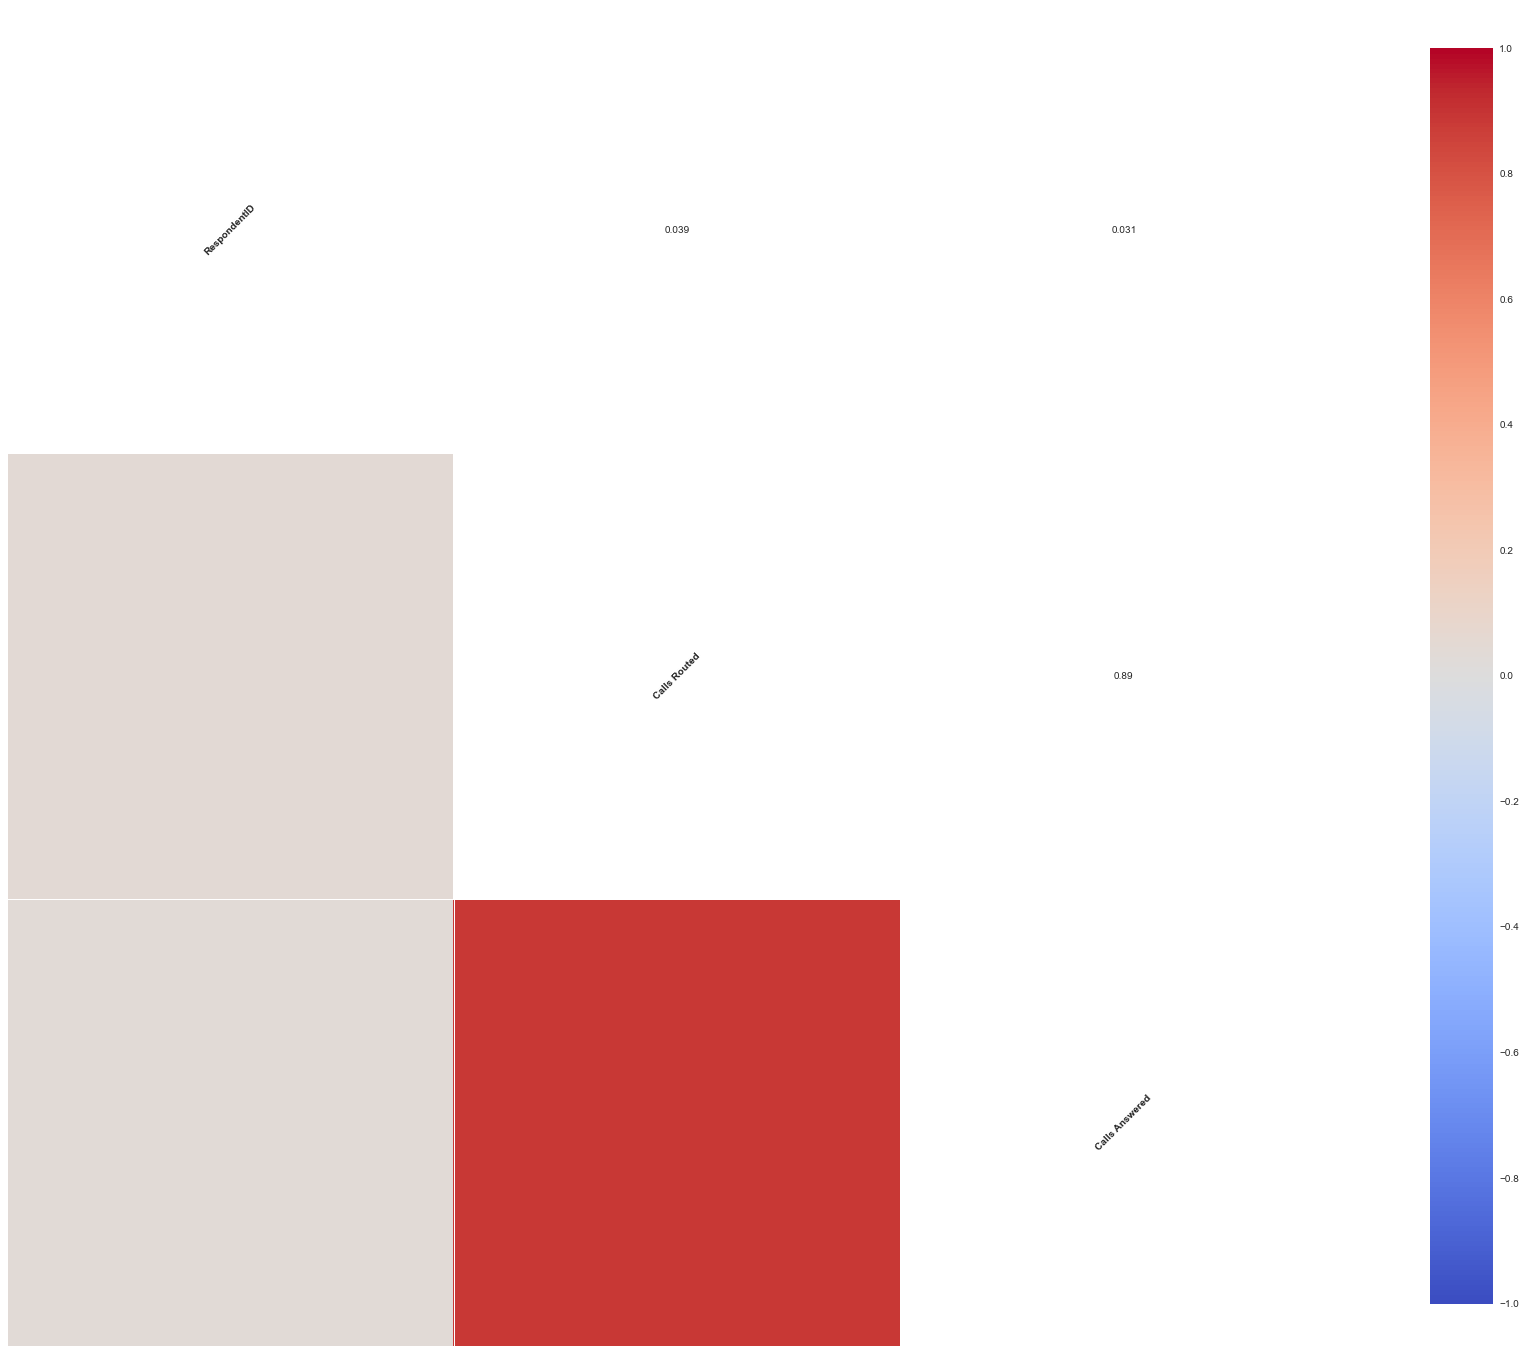

In [90]:
# Correlation Plot
sns.set_context(rc={"figure.figsize": (30,30)})  # set size
sns.corrplot(datacut, sig_stars=True, cbar=True, method='kendall')  # pearson, kendall, spearman

In [52]:
titanic = sns.load_dataset("titanic").dropna()
attention = sns.load_dataset("attention")
sns.set_context(rc={"figure.figsize": (8, 8)})